In [ ]:
import os
import zipfile
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm import tqdm
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt, medfilt
from scipy import fftpack
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.utils import plot_model

%matplotlib inline

In [ ]:
!wget -P ./ "https://archive.ics.uci.edu/static/public/319/mhealth+dataset.zip" -O "mhealth.zip"

--2024-04-18 23:33:07--  https://archive.ics.uci.edu/static/public/319/mhealth+dataset.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘mhealth.zip’

ealth.zip               [            <=>     ]  72.07M  22.3MB/s    in 4.4s    

2024-04-18 23:33:11 (16.3 MB/s) - ‘mhealth.zip’ saved [75567983]



In [ ]:
filename = './mhealth.zip'
with zipfile.ZipFile(filename, 'r') as zip_ref:
  zip_ref.extractall('./')

In [ ]:
mhealth_dir=  './MHEALTHDATASET/'
files = [mhealth_dir + file_ for file_ in os.listdir(mhealth_dir) if '.log' in file_]

In [ ]:
dataset = []
for idx, file_ in tqdm(enumerate(files)):
  with open(file_, 'r') as f:
    lines = f.readlines()

  for line in lines:
    dataset.append([str(idx)] + line.strip().split('\t'))

dataset = np.array(dataset)

10it [00:15,  1.55s/it]


In [ ]:
cols_name = ['user', 'a_chest_x', 'a_chest_y', 'a_chest_z', 'ecg1', 'ecg2', 'a_lankle_x', 'a_lankle_y', 'a_lankle_z', 'g_lankle_x', 'g_lankle_y', 'g_lankle_z', 'mag_lankle_x', 'mag_lankle_y', 'mag_lankle_z', 'a_rarm_x', 'a_rarm_y', 'a_rarm_z', 'g_rarm_x', 'g_rarm_y', 'g_rarm_z', 'mag_rarm_x', 'mag_rarm_y', 'mag_rarm_z', 'label']

In [ ]:
df = pd.DataFrame(dataset, columns=cols_name)

In [ ]:
df

,user,a_chest_x,a_chest_y,a_chest_z,ecg1,ecg2,a_lankle_x,a_lankle_y,a_lankle_z,g_lankle_x,...,a_rarm_x,a_rarm_y,a_rarm_z,g_rarm_x,g_rarm_y,g_rarm_z,mag_rarm_x,mag_rarm_y,mag_rarm_z,label
0,0,-2.123,2.1088,-8.9576,-0.10884,-0.44793,1.5686,-9.6207,0.30548,-0.80891,...,-6.7368,-6.6124,2.7631,-1.2333,-0.47844,-0.051724,1.7621,-3.3198,-3.5417,0
1,0,-1.8362,1.9103,-9.0281,-0.096285,-0.43119,1.4369,-9.8798,0.13496,-0.80148,...,-6.4254,-6.5098,3.0183,-1.2333,-0.47844,-0.051724,0.29516,-6.3904,-3.5403,0
2,0,-1.9329,1.6969,-8.9946,-0.083726,-0.42282,1.3765,-9.839,0.2614,-0.80148,...,-6.5062,-6.7122,2.779,-1.2333,-0.47844,-0.051724,-0.77827,-6.0134,-3.2045,0
3,0,-2.0768,1.8189,-9.2153,-0.092098,-0.38514,1.4263,-9.7102,0.26834,-0.80148,...,-5.906,-6.7621,2.7869,-1.249,-0.46817,-0.045259,-0.61505,-7.6446,-2.8239,0
4,0,-1.6793,2.1446,-9.0701,-0.11722,-0.40188,1.8053,-9.8988,0.22103,-0.81262,...,-6.7218,-6.8831,2.6871,-1.249,-0.46817,-0.045259,-1.5034,-6.7105,-1.046,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1215740,9,-9.1082,0.358,-3.4941,-0.66562,-0.17164,1.3295,-9.7649,0.73338,-0.6475,...,-3.805,-8.2907,1.9292,-0.89216,-0.43326,0.34698,37.118,49.361,-35.852,0
1215741,9,-8.9306,0.067634,-3.5729,-0.71167,-0.2135,0.80398,-9.9698,1.0408,-0.6475,...,-3.7768,-8.0509,1.91,-0.89216,-0.43326,0.34698,36.591,50.441,-37.318,0
1215742,9,-9.0072,0.35922,-3.515,-1.4359,-0.66562,1.0541,-10.465,1.0706,-0.61596,...,-4.2743,-8.2643,2.5659,-0.91569,-0.47433,0.20259,35.334,50.457,-36.982,0
1215743,9,-9.2209,-0.066671,-3.5639,-0.03349,0.2428,0.98146,-9.7757,1.6356,-0.61596,...,-4.2828,-7.9625,2.7477,-0.91569,-0.47433,0.20259,33.508,47.418,-34.1,0


In [ ]:
label_map = {1:'Standing_still', 2:'Sitting & Relaxing', 3:'Lying Down', 4:'Walking', 5:'Climbing Stairs', 6:'Waist Bend Forward', 7: 'Frontal Elevation of Arms', 8:'Kness Bending', 9:'Cycling', 10:'Jogging', 11:'Running', 12:'Jump Front & Back'}

In [ ]:
# only use - right arm data acceleration and gyroscope and label
data = df[['user', 'a_rarm_x', 'a_rarm_y', 'a_rarm_z', 'g_rarm_x', 'g_rarm_y', 'g_rarm_z', 'label']].copy()
data

,user,a_rarm_x,a_rarm_y,a_rarm_z,g_rarm_x,g_rarm_y,g_rarm_z,label
0,0,-6.7368,-6.6124,2.7631,-1.2333,-0.47844,-0.051724,0
1,0,-6.4254,-6.5098,3.0183,-1.2333,-0.47844,-0.051724,0
2,0,-6.5062,-6.7122,2.779,-1.2333,-0.47844,-0.051724,0
3,0,-5.906,-6.7621,2.7869,-1.249,-0.46817,-0.045259,0
4,0,-6.7218,-6.8831,2.6871,-1.249,-0.46817,-0.045259,0
...,...,...,...,...,...,...,...,...
1215740,9,-3.805,-8.2907,1.9292,-0.89216,-0.43326,0.34698,0
1215741,9,-3.7768,-8.0509,1.91,-0.89216,-0.43326,0.34698,0
1215742,9,-4.2743,-8.2643,2.5659,-0.91569,-0.47433,0.20259,0
1215743,9,-4.2828,-7.9625,2.7477,-0.91569,-0.47433,0.20259,0


In [ ]:
data = data[data['label'] != '0'].copy()

In [ ]:
data

,user,a_rarm_x,a_rarm_y,a_rarm_z,g_rarm_x,g_rarm_y,g_rarm_z,label
2304,0,-2.4757,-9.5828,0.71878,-0.35686,-0.44148,-0.036638,5
2305,0,-2.524,-9.5734,0.65675,-0.35686,-0.44148,-0.036638,5
2306,0,-2.2135,-9.2912,0.87919,-0.35686,-0.44148,-0.036638,5
2307,0,-1.9575,-9.6221,0.78973,-0.41373,-0.40246,-0.0064655,5
2308,0,-2.0723,-9.6604,0.9649,-0.41373,-0.40246,-0.0064655,5
...,...,...,...,...,...,...,...,...
1214204,9,2.2801,-2.804,1.5994,-0.12941,-0.75565,0.81466,12
1214205,9,4.0729,3.3877,-3.2264,-0.12941,-0.6694,0.89009,12
1214206,9,-0.017839,4.8664,-3.3608,-0.12941,-0.6694,0.89009,12
1214207,9,-3.121,1.7744,-0.55711,-0.12941,-0.6694,0.89009,12


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 343195 entries, 2304 to 1214208
Data columns (total 8 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   user      343195 non-null  object
 1   a_rarm_x  343195 non-null  object
 2   a_rarm_y  343195 non-null  object
 3   a_rarm_z  343195 non-null  object
 4   g_rarm_x  343195 non-null  object
 5   g_rarm_y  343195 non-null  object
 6   g_rarm_z  343195 non-null  object
 7   label     343195 non-null  object
dtypes: object(8)
memory usage: 23.6+ MB


In [ ]:
data['user'] = data['user'].astype(str)
data['a_rarm_x'] = data['a_rarm_x'].astype(np.float32)
data['a_rarm_y'] = data['a_rarm_y'].astype(np.float32)
data['a_rarm_z'] = data['a_rarm_z'].astype(np.float32)
data['g_rarm_x'] = data['g_rarm_x'].astype(np.float32)
data['g_rarm_y'] = data['g_rarm_y'].astype(np.float32)
data['g_rarm_z'] = data['g_rarm_z'].astype(np.float32)
data['label'] = data['label'].astype(np.int32)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 343195 entries, 2304 to 1214208
Data columns (total 8 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   user      343195 non-null  object 
 1   a_rarm_x  343195 non-null  float32
 2   a_rarm_y  343195 non-null  float32
 3   a_rarm_z  343195 non-null  float32
 4   g_rarm_x  343195 non-null  float32
 5   g_rarm_y  343195 non-null  float32
 6   g_rarm_z  343195 non-null  float32
 7   label     343195 non-null  int32  
dtypes: float32(6), int32(1), object(1)
memory usage: 14.4+ MB


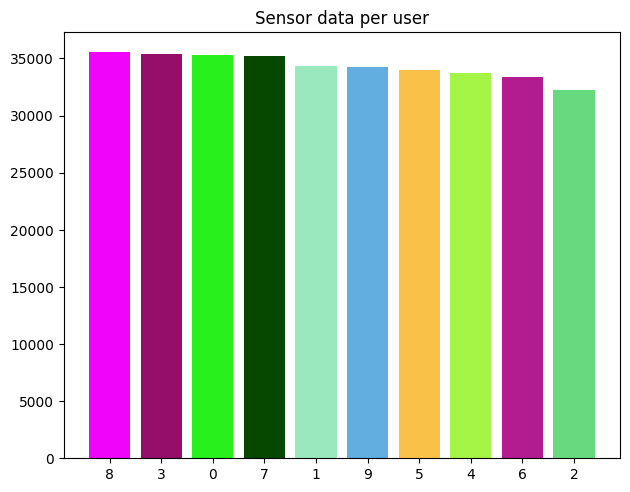

In [ ]:
a = data['user'].value_counts()
plt.bar(a.keys(), a.values, color=np.random.rand(len(a.keys()), 3), align='center')
plt.xticks(a.keys())
plt.tight_layout()
plt.title('Sensor data per user')
plt.show()

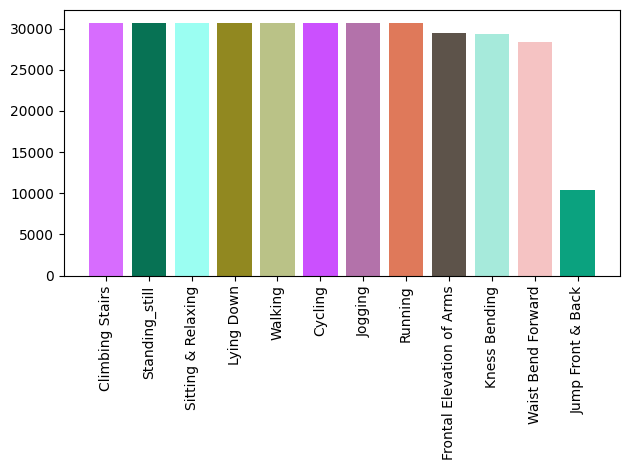

In [ ]:
a = data['label'].value_counts()
plt.bar(a.keys().map(label_map), a.values, color=np.random.rand(len(a.keys()), 3), align='center')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
def plot_fft(data):
    y = data
    N = data.size
    T = 1.0 / 50.0
    x = np.linspace(0.0, N*T, N)
    yf = np.abs(fftpack.fft(y))
    xf = fftpack.fftfreq(N, d=T)

    fig, ax = plt.subplots()
    ax.plot(np.abs(xf), np.abs(yf))
    ax.set_xlim(-0.5, 20)
    plt.show()

def remove_noise(data):
  median_filter = np.apply_along_axis(medfilt, 0, data)
  med_f_signal = medfilt(data, kernel_size=5)

  cuttoff = 2
  sampling_freq = 50
  nyquist_freq = 0.5 * sampling_freq
  cuttoff_norm = cuttoff / nyquist_freq
  b, a = butter(3, cuttoff_norm, btype='low')
  filtered = filtfilt(b, a, med_f_signal)

  return filtered

In [ ]:
#visualizing random activity performed by a random subject
classes = data['label'].unique()
subjects = data['user'].unique()

random_activity_num = np.random.randint(0, len(classes))

print(f"Classes: {classes}\n")
print(f"Subjects: {subjects}\n")
print(f"Activity index number: {random_activity_num}")
print(f"Random Activity: {classes[random_activity_num]}")

Classes: [ 5  1  2  3  4  6  7  8  9 10 11 12]

Subjects: ['0' '1' '2' '3' '4' '5' '6' '7' '8' '9']

Activity index number: 1
Random Activity: 1


In [ ]:
random_sample = data[data['label'] == classes[random_activity_num]].copy()
users = random_sample['user'].unique()

random_user = np.random.randint(0, len(users))
random_sample = random_sample[random_sample['user'] == users[random_user]]

random_sample

,user,a_rarm_x,a_rarm_y,a_rarm_z,g_rarm_x,g_rarm_y,g_rarm_z,label
129024,1,-2.7267,-9.0376,1.23560,-0.80784,-0.70226,-0.15302,1
129025,1,-2.7424,-9.3879,1.20770,-0.80784,-0.70226,-0.15302,1
129026,1,-2.7871,-8.9777,1.22820,-0.80784,-0.68994,-0.15948,1
129027,1,-2.9003,-9.2391,1.09010,-0.80784,-0.68994,-0.15948,1
129028,1,-2.9607,-9.2091,1.09160,-0.80784,-0.68994,-0.15948,1
...,...,...,...,...,...,...,...,...
132091,1,-2.6583,-9.2796,1.03600,-0.80784,-0.70431,-0.16379,1
132092,1,-2.8882,-9.1003,0.97207,-0.79608,-0.70637,-0.17888,1
132093,1,-2.8395,-9.0400,0.99591,-0.79608,-0.70637,-0.17888,1
132094,1,-2.9213,-9.0195,1.04900,-0.79608,-0.70637,-0.17888,1


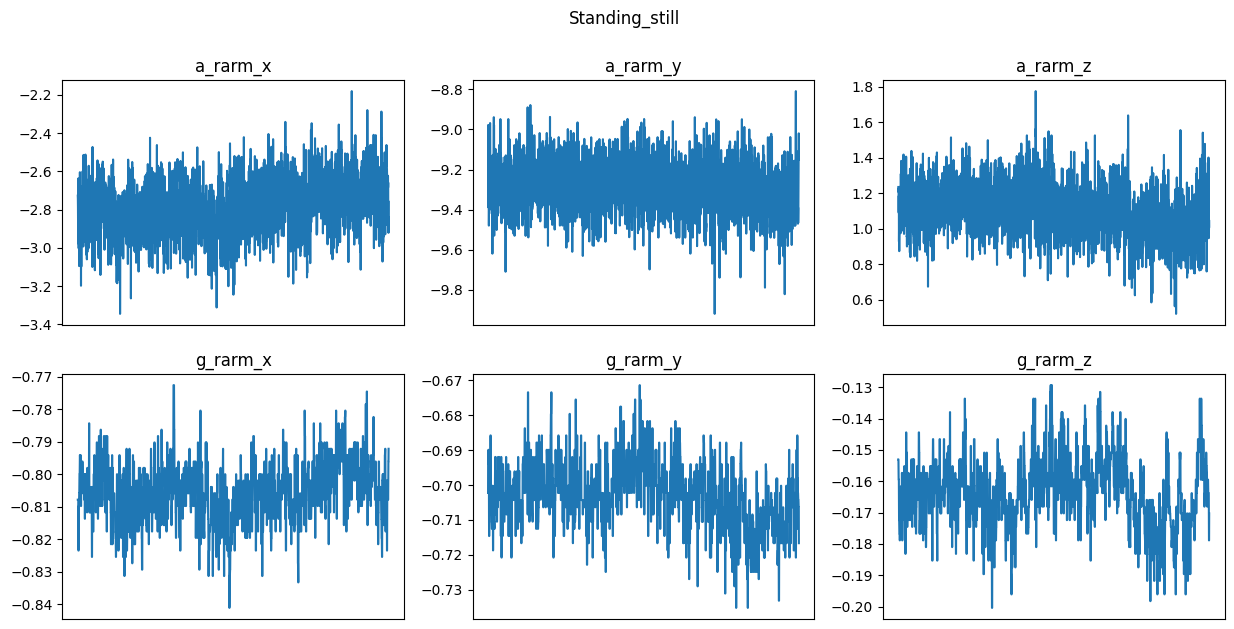

In [ ]:
data_labels = list(random_sample.columns[1:-1])
plt.figure(figsize=(15, 7))
for i, label in enumerate(data_labels):
  plt.subplot(2, 3, i+1)
  plt.plot(random_sample[label])
  plt.title(label)
  plt.xticks([])
  plt.suptitle(label_map[random_sample['label'].unique()[0]])
plt.show()

In [ ]:
# Removing noise
for i, axis in enumerate(data_labels):
  random_sample[axis] = remove_noise(random_sample[axis])
print(f"Noise Removed...")

Noise Removed...


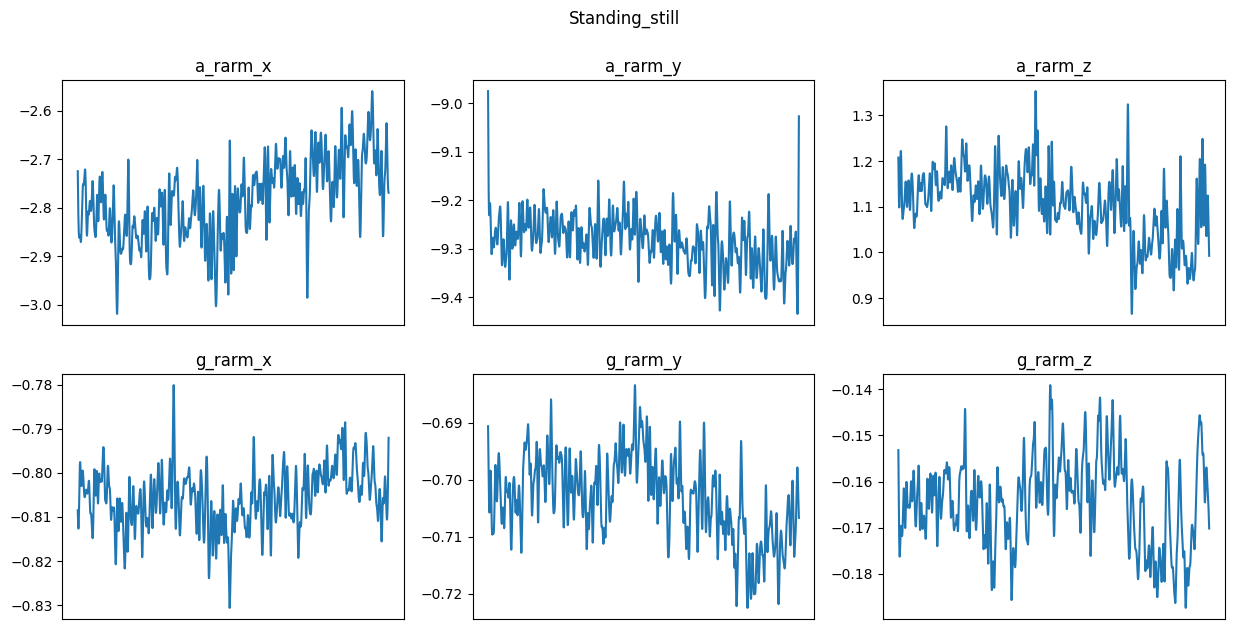

In [ ]:
data_labels = list(random_sample.columns[1:-1])
plt.figure(figsize=(15, 7))
for i, label in enumerate(data_labels):
  plt.subplot(2, 3, i+1)
  plt.plot(random_sample[label])
  plt.title(label)
  plt.xticks([])
  plt.suptitle(label_map[random_sample['label'].unique()[0]])
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from keras.utils import to_categorical

In [ ]:
label_enc = LabelEncoder()
data['label'] = label_enc.fit_transform(data['label'])

In [ ]:
label_enc.classes_

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int32)

In [ ]:
label_enc.inverse_transform(data['label'].unique())

array([ 5,  1,  2,  3,  4,  6,  7,  8,  9, 10, 11, 12], dtype=int32)

In [ ]:
data['label'].unique()

array([ 4,  0,  1,  2,  3,  5,  6,  7,  8,  9, 10, 11])

In [ ]:
fs = 50
frame_size = fs * 4
hop_size = fs * 2

In [ ]:
def get_frames(df, frame_size, hop_size):
  n_features = 6
  frames = []
  labels = []
  for i in range(0, len(df) - frame_size, hop_size):
    x = df['a_rarm_x'].values[i: i + frame_size]
    y = df['a_rarm_y'].values[i: i + frame_size]
    z = df['a_rarm_z'].values[i: i + frame_size]

    gx = df['g_rarm_x'].values[i: i + frame_size]
    gy = df['g_rarm_y'].values[i: i + frame_size]
    gz = df['g_rarm_z'].values[i: i + frame_size]

    label = df['label'][i:i+frame_size].mode()[0]
    frames.append([x, y, z, gx, gy, gz])
    labels.append(label)

  frames = np.array(frames).reshape(-1, frame_size, n_features)
  labels = np.array(labels)

  return frames, labels

In [ ]:
# Removing Noise
for i, label in tqdm(enumerate(data.columns[1:-1])):
  data[label] = remove_noise(data[label])

6it [00:00, 32.59it/s]


In [ ]:
scaler = StandardScaler()

In [ ]:
# Splitting dataset based on users
n = len(data['user'].unique())
n_train = int(n * 0.7)
n_val = int(n * 0.2)
n_test = int(n * 0.1)

print(f"Training: {n_train} users, Validation: {n_val} users, Testing: {n_test} users")

Training: 7 users, Validation: 2 users, Testing: 1 users


In [ ]:
ids = data['user'].unique()
np.random.shuffle(ids)
train_users = ids[:n_train]
val_users = ids[n_train:n_train + n_val]
test_users = ids[n_train + n_val:]

training = data[data['user'].isin(train_users)]
validation = data[data['user'].isin(val_users)]
testing = data[data['user'].isin(test_users)]

print(f"Training -> {training.shape}")
print(f"Validaiton -> {validation.shape}")
print(f"Testing -> {testing.shape}")

Training -> (240078, 8)
Validaiton -> (67737, 8)
Testing -> (35380, 8)


In [ ]:
# Standardizing data
X_train = training[['a_rarm_x', 'a_rarm_y', 'a_rarm_z', 'g_rarm_x', 'g_rarm_y', 'g_rarm_z']].copy()
X_val = validation[['a_rarm_x', 'a_rarm_y', 'a_rarm_z', 'g_rarm_x', 'g_rarm_y', 'g_rarm_z']].copy()
X_test = testing[['a_rarm_x', 'a_rarm_y', 'a_rarm_z', 'g_rarm_x', 'g_rarm_y', 'g_rarm_z']].copy()

In [ ]:
x_train_s = scaler.fit_transform(X_train)
x_val_s = scaler.fit_transform(X_val)
x_test_s = scaler.fit_transform(X_test)

In [ ]:
train_data = pd.DataFrame(data=x_train_s, columns=['a_rarm_x', 'a_rarm_y', 'a_rarm_z', 'g_rarm_x', 'g_rarm_y', 'g_rarm_z'])
train_data['label'] = training['label'].values

val_data = pd.DataFrame(data=x_val_s, columns=['a_rarm_x', 'a_rarm_y', 'a_rarm_z', 'g_rarm_x', 'g_rarm_y', 'g_rarm_z'])
val_data['label'] = validation['label'].values

test_data = pd.DataFrame(data=x_test_s, columns=['a_rarm_x', 'a_rarm_y', 'a_rarm_z', 'g_rarm_x', 'g_rarm_y', 'g_rarm_z'])
test_data['label'] = testing['label'].values

In [ ]:
train_data

,a_rarm_x,a_rarm_y,a_rarm_z,g_rarm_x,g_rarm_y,g_rarm_z,label
0,0.313566,-0.618316,-0.490064,-0.306200,-0.095161,-0.934865,4
1,0.317005,-0.626222,-0.430563,-0.327888,-0.077318,-0.913961,4
2,0.321035,-0.634224,-0.369966,-0.349495,-0.059026,-0.892164,4
3,0.325936,-0.642502,-0.307878,-0.370766,-0.040212,-0.869084,4
4,0.332013,-0.651258,-0.244037,-0.391451,-0.020823,-0.844346,4
...,...,...,...,...,...,...,...
240073,0.880740,-0.388394,-0.048634,0.100358,-0.647650,0.866906,11
240074,0.903981,-0.118396,-0.193878,0.100416,-0.614295,0.901713,11
240075,0.914708,0.170598,-0.338984,0.099749,-0.580739,0.936484,11
240076,0.914256,0.466959,-0.479627,0.098585,-0.547916,0.970310,11


In [ ]:
# Segmentation
x_train, y_train = get_frames(train_data, frame_size, hop_size)
x_val, y_val = get_frames(val_data, frame_size, hop_size)
x_test, y_test = get_frames(test_data, frame_size, hop_size)

print(f"[Training] {x_train.shape}, labels: {y_train.shape}")
print(f"[Testing] {x_test.shape}, labels: {y_test.shape}")
print(f"[Validation] {x_val.shape}, labels: {y_val.shape}")

[Training] (2399, 200, 6), labels: (2399,)
[Testing] (352, 200, 6), labels: (352,)
[Validation] (676, 200, 6), labels: (676,)


In [ ]:
n_classes = len(data['label'].unique())
print(n_classes)

12


In [ ]:
y_train = to_categorical(y_train, num_classes=n_classes)
y_val = to_categorical(y_val, num_classes=n_classes)
y_test = to_categorical(y_test, num_classes=n_classes)

#x_train = np.expand_dims(x_train, axis=3)
#x_val = np.expand_dims(x_val, axis=3)
#x_test = np.expand_dims(x_test, axis=3)

print(f"[Training] {x_train.shape}, labels: {y_train.shape}")
print(f"[Testing] {x_test.shape}, labels: {y_test.shape}")
print(f"[Validation] {x_val.shape}, labels: {y_val.shape}")

[Training] (2399, 200, 6), labels: (2399, 12)
[Testing] (352, 200, 6), labels: (352, 12)
[Validation] (676, 200, 6), labels: (676, 12)


In [ ]:
import tensorflow as tf
from keras.layers import Conv1D, Dropout, MaxPooling1D, Flatten, concatenate, Dense, BatchNormalization, Bidirectional, LSTM, Dense, Input, Reshape, Activation
from keras.models import Model, save_model, load_model

In [ ]:
inputs = layers.Input(shape= (x_train.shape[1], x_train.shape[2])) #(200, 562))

# Conv Model
conv1 = layers.Conv1D(filters=64, kernel_size=5, padding='same')(inputs)
conv1 = BatchNormalization()(conv1)
conv1 = Activation('relu')(conv1)

conv2 = layers.Conv1D(filters=64, kernel_size=3, padding='same')(conv1)
conv2 = BatchNormalization()(conv2)
conv2 = Activation('relu')(conv2)
l3 = layers.Dropout(0.3)(conv2)
l4 = layers.MaxPooling1D(pool_size=2)(l3)
l5 = layers.Flatten()(l4)
#l5 = BatchNormalization()(l5)

# LSTM Model
b1 = layers.Bidirectional(layers.LSTM(128, return_sequences=True))(inputs)
b2 = layers.Bidirectional(layers.LSTM(64, return_sequences=True))(b1)
l6 = layers.Dropout(0.3)(b2)
l7 = layers.Flatten()(l6)
#l7 = BatchNormalization()(l7)

concatenated = layers.concatenate([l5, l7])
dense1 = layers.Dense(32, activation='relu')(concatenated)
bnorm = layers.BatchNormalization()(dense1)
outputs = layers.Dense(12, activation='softmax')(bnorm)

model = models.Model(inputs=inputs, outputs=outputs)

optimizer = optimizers.Adam(learning_rate=0.002)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 200, 6)]             0         []                            
                                                                                                  
 conv1d (Conv1D)             (None, 200, 64)              1984      ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 200, 64)              256       ['conv1d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 200, 64)              0         ['batch_normalization[0][0

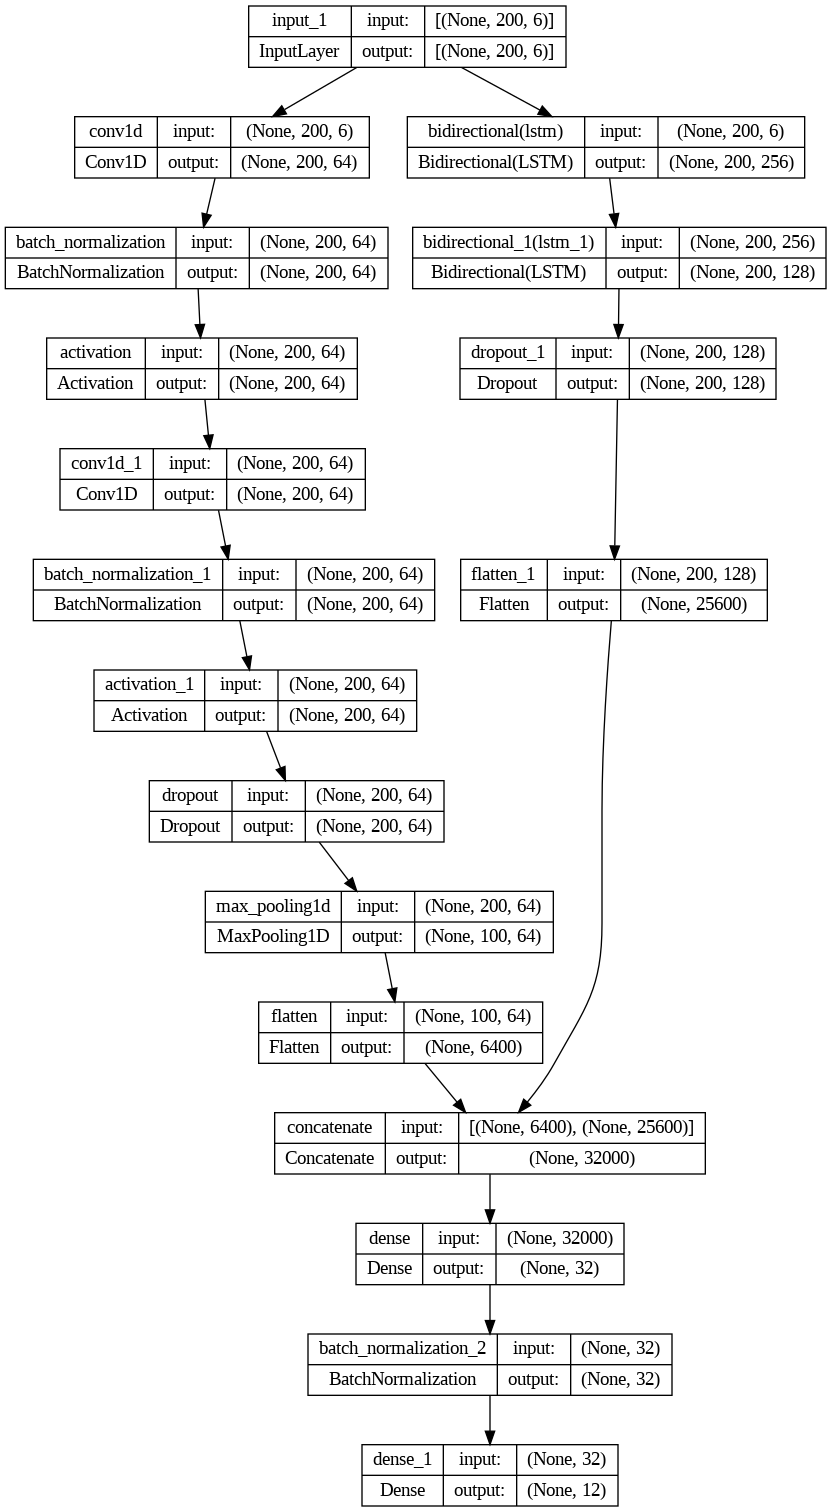

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model, to_file='model_structure.png', show_shapes=True)


In [ ]:
from keras.optimizers import Adam, SGD
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint

In [ ]:
#optimizer = SGD(learning_rate=0.002)
#model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

#reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.01, patience=10, min_lr=1e-4)
checkpoint = ModelCheckpoint(filepath='model_checkpoint.h5', monitor='val_accuracy', save_best_only=True)

In [ ]:
history = model.fit(x_train, y_train, epochs=150, validation_data=(x_val, y_val), verbose=1, batch_size=512, callbacks=[checkpoint])

Epoch 1/150
5/5 [==============================] - 15s 609ms/step - loss: 1.7442 - accuracy: 0.4414 - val_loss: 2.6352 - val_accuracy: 0.4527
Epoch 2/150


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


5/5 [==============================] - 1s 167ms/step - loss: 0.9940 - accuracy: 0.7095 - val_loss: 2.4151 - val_accuracy: 0.4349
Epoch 3/150
5/5 [==============================] - 1s 169ms/step - loss: 0.8097 - accuracy: 0.7841 - val_loss: 2.5548 - val_accuracy: 0.4083
Epoch 4/150
5/5 [==============================] - 1s 173ms/step - loss: 0.6677 - accuracy: 0.8145 - val_loss: 2.0357 - val_accuracy: 0.3669
Epoch 5/150
5/5 [==============================] - 1s 157ms/step - loss: 0.5576 - accuracy: 0.8691 - val_loss: 2.6230 - val_accuracy: 0.2722
Epoch 6/150
5/5 [==============================] - 1s 178ms/step - loss: 0.4559 - accuracy: 0.8941 - val_loss: 2.8054 - val_accuracy: 0.2678
Epoch 7/150
5/5 [==============================] - 1s 172ms/step - loss: 0.3660 - accuracy: 0.9400 - val_loss: 2.7859 - val_accuracy: 0.2618
Epoch 8/150
5/5 [==============================] - 1s 152ms/step - loss: 0.2941 - accuracy: 0.9546 - val_loss: 2.5846 - val_accuracy: 0.3077
Epoch 9/150
5/5 [========

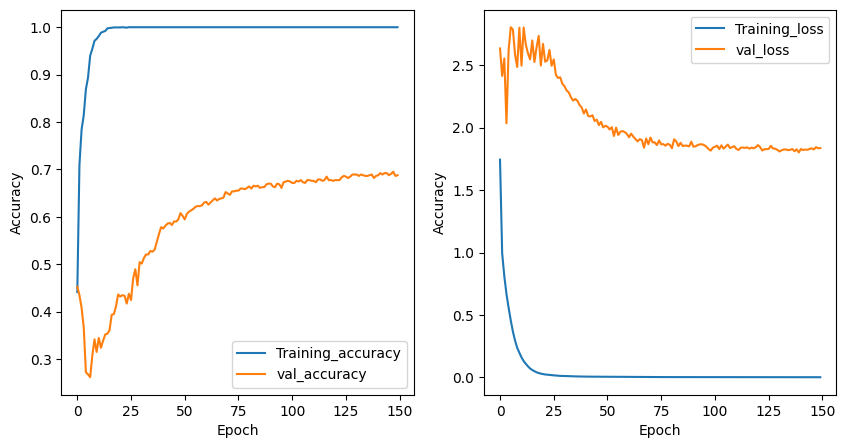

In [ ]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training_accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='best')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training_loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='best')

plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

In [ ]:
#a = x_test.reshape((x_test.shape[0], x_test.shape[1], x_test.shape[2]))
y_pred = model.predict(x_test)

11/11 [==============================] - 2s 18ms/step


(<Figure size 1000x1000 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

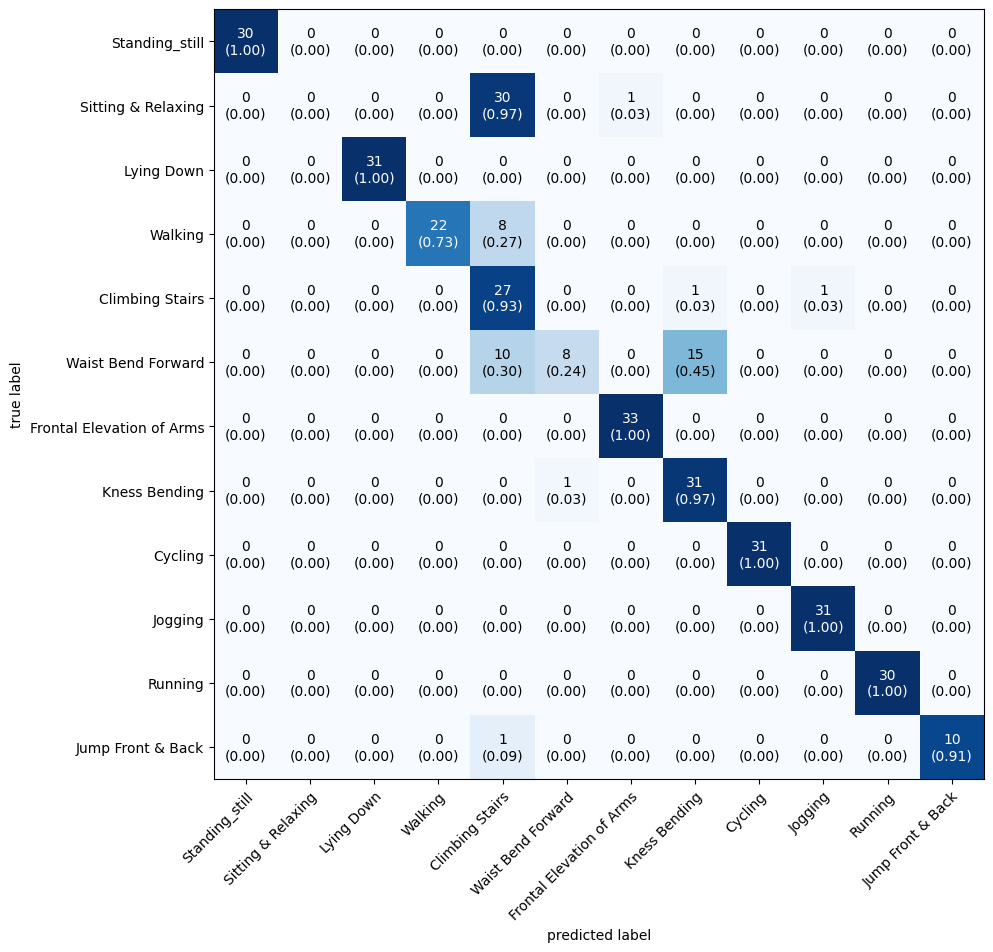

In [ ]:
mat = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))
plot_confusion_matrix(conf_mat=mat, show_normed=True, class_names=label_map.values(), figsize=(10, 10))

In [ ]:
from sklearn.metrics import classification_report

y_pred = model.predict(x_test)
y_true = np.argmax(y_test, axis=1)
y_pred_classes = np.argmax(y_pred, axis=1)

report = classification_report(y_true, y_pred_classes)

11/11 [==============================] - 0s 14ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       0.00      0.00      0.00        31
           2       1.00      1.00      1.00        31
           3       1.00      0.73      0.85        30
           4       0.36      0.93      0.51        29
           5       0.89      0.24      0.38        33
           6       0.97      1.00      0.99        33
           7       0.66      0.97      0.78        32
           8       1.00      1.00      1.00        31
           9       0.97      1.00      0.98        31
          10       1.00      1.00      1.00        30
          11       1.00      0.91      0.95        11

    accuracy                           0.81       352
   macro avg       0.82      0.82      0.79       352
weighted avg       0.81      0.81      0.78       352





---



---



In [ ]:
filename = './SensorBox2.zip'
with zipfile.ZipFile(filename, 'r') as zip_ref:
  zip_ref.extractall('./')

In [ ]:
path = './SensorBox/'
recs = [path + folder + '/' for folder in os.listdir(path)]

In [ ]:
test = recs[0]
test

'./SensorBox/walking 2/'

In [ ]:
new_data = pd.DataFrame()

In [ ]:
for idx, folder in enumerate(recs):
  acc = []
  gyro = []
  acc_gyro_files = [folder + file_ for file_ in os.listdir(folder) if '.csv' in file_]
  for csv_file in acc_gyro_files:
    with open(csv_file, 'r') as f:
      lines = f.readlines()

    if 'GYRO' in csv_file:
      for line in lines:
        gyro.append(line.strip().split(';'))
    else:
      for line in lines:
        acc.append(line.strip().split(';'))

  gyro = np.array(gyro)
  acc = np.array(acc)
  #print(gyro[0, :])
  #print(acc[0, :])
  gyro_df = pd.DataFrame(gyro[1:, :], columns=['t_Android','t_unix','gx','gy','gz','ga'])
  gyro_df['label'] = csv_file.split('/')[2].split()[0]
  gyro_df['user'] = idx
  acc_df = pd.DataFrame(acc[1:, :], columns=['t_Android','t_unix','ax','ay','az','a'])
  acc_df['label'] = csv_file.split('/')[2].split()[0]
  acc_df['user'] = idx

  #print(acc_df.head())
  #print(gyro_df.head())

  merged = pd.merge(acc_df, gyro_df, on=['label', 't_unix'])
  new_data = pd.concat([new_data, merged])

In [ ]:
new_data

,t_Android_x,t_unix,ax,ay,az,a,label,user_x,t_Android_y,gx,gy,gz,ga,user_y
0,2069825882995119,1712675052429,-0.1266,-0.47239998,1.5244,0,walking,0,2069825875907056,0.22031291,-0.29017845,0.21074851,3,0
1,2069825882995119,1712675052429,-0.1266,-0.47239998,1.5244,0,walking,0,2069825879875806,0.22031291,-0.29017845,0.21074851,3,0
2,2069825882995119,1712675052429,-0.1266,-0.47239998,1.5244,0,walking,0,2069825883846119,0.22031291,-0.29017845,0.21074851,3,0
3,2069825882995119,1712675052429,-0.1266,-0.47239998,1.5244,0,walking,0,2069825887816431,0.22031291,-0.29017845,0.21074851,3,0
4,2069825882995119,1712675052429,-0.1266,-0.47239998,1.5244,0,walking,0,2069825891786744,0.22031291,-0.29017845,0.21074851,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5733,2069497182798244,1712674723670,-0.39909998,-0.29099998,0.1077,0,standing,9,2069497179678931,0.0074700094,0.09953613,0.7064918,3,9
5734,2069497182798244,1712674723670,-0.39909998,-0.29099998,0.1077,0,standing,9,2069497183649244,0.0074700094,0.09953613,0.7064918,3,9
5735,2069497182798244,1712674723670,-0.39909998,-0.29099998,0.1077,0,standing,9,2069497187617994,0.0074700094,0.09953613,0.7064918,3,9
5736,2069497182798244,1712674723670,-0.39909998,-0.29099998,0.1077,0,standing,9,2069497191588306,0.0074700094,0.09953613,0.7064918,3,9


In [ ]:
new_data['label']=new_data['label'].str.replace('staning', 'standing')

In [ ]:
# Adjusting labels
mapp = {'standing':1, 'elevate':7, 'lying':3, 'walking':4, 'climbing':5}

In [ ]:
new_data['label'] = new_data['label'].map(mapp)

In [ ]:
new_data['label'] = label_enc.transform(new_data['label'])

In [ ]:
new_data = new_data.drop(columns=['t_Android_x', 't_unix', 'a', 'user_x', 't_Android_y', 'ga', 'user_y'])

In [ ]:
new_data['label'].unique()

array([3, 2, 4, 6, 0])

In [ ]:
new_data = new_data[['ax', 'ay', 'az', 'gx', 'gy', 'gz', 'label']].copy()

In [ ]:
new_data

,ax,ay,az,gx,gy,gz,label
0,-0.1266,-0.47239998,1.5244,0.22031291,-0.29017845,0.21074851,3
1,-0.1266,-0.47239998,1.5244,0.22031291,-0.29017845,0.21074851,3
2,-0.1266,-0.47239998,1.5244,0.22031291,-0.29017845,0.21074851,3
3,-0.1266,-0.47239998,1.5244,0.22031291,-0.29017845,0.21074851,3
4,-0.1266,-0.47239998,1.5244,0.22031291,-0.29017845,0.21074851,3
...,...,...,...,...,...,...,...
5733,-0.39909998,-0.29099998,0.1077,0.0074700094,0.09953613,0.7064918,0
5734,-0.39909998,-0.29099998,0.1077,0.0074700094,0.09953613,0.7064918,0
5735,-0.39909998,-0.29099998,0.1077,0.0074700094,0.09953613,0.7064918,0
5736,-0.39909998,-0.29099998,0.1077,0.0074700094,0.09953613,0.7064918,0


In [ ]:
new_data['ax'] = new_data['ax'].astype(float)
new_data['ay'] = new_data['ay'].astype(float)
new_data['az'] = new_data['az'].astype(float)
new_data['gx'] = new_data['gx'].astype(float)
new_data['gy'] = new_data['gy'].astype(float)
new_data['gz'] = new_data['gz'].astype(float)


In [ ]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 75211 entries, 0 to 5737
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ax      75211 non-null  float64
 1   ay      75211 non-null  float64
 2   az      75211 non-null  float64
 3   gx      75211 non-null  float64
 4   gy      75211 non-null  float64
 5   gz      75211 non-null  float64
 6   label   75211 non-null  int64  
dtypes: float64(6), int64(1)
memory usage: 4.6 MB


In [ ]:
scaler2 = StandardScaler()

In [ ]:
def get_frames2(df, frame_size, hop_size):
  n_features = 6
  frames = []
  labels = []
  for i in range(0, len(df) - frame_size, hop_size):
    x = df['ax'].values[i: i + frame_size]
    y = df['ay'].values[i: i + frame_size]
    z = df['az'].values[i: i + frame_size]

    gx = df['gx'].values[i: i + frame_size]
    gy = df['gy'].values[i: i + frame_size]
    gz = df['gz'].values[i: i + frame_size]

    label = df['label'][i:i+frame_size].mode()[0]
    frames.append([x, y, z, gx, gy, gz])
    labels.append(label)

  frames = np.array(frames).reshape(-1, frame_size, n_features)
  labels = np.array(labels)

  return frames, labels

In [ ]:
fs = 50
frame_size = fs * 4
hop_size = fs * 2

In [ ]:
# remove noise
# Removing Noise
for i, label in tqdm(enumerate(new_data.columns[:-1])):
  new_data[label] = remove_noise(new_data[label])
# Standardize
X = new_data[['ax', 'ay', 'az', 'gx', 'gy', 'gz']].copy()
X.columns = ['a_rarm_x', 'a_rarm_y', 'a_rarm_z', 'g_rarm_x', 'g_rarm_y', 'g_rarm_z']
X_scaled = scaler.fit_transform(X)
scaled = pd.DataFrame(X_scaled, columns=['ax', 'ay', 'az', 'gx', 'gy', 'gz'])
scaled['label'] = new_data['label'].values
#segment
segments, labels = get_frames2(scaled, frame_size, hop_size)
#labels = to_categorical(labels, num_classes=12)
print(f"Segments: {segments.shape}, labels: {labels.shape}")

6it [00:00, 165.28it/s]

Segments: (751, 200, 6), labels: (751,)


In [ ]:
preds = model.predict(segments)

24/24 [==============================] - 2s 21ms/step


In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy = accuracy_score(labels, np.argmax(preds, axis=1))
print("Accuracy:", accuracy)

Accuracy: 0.23302263648468707


In [ ]:
from sklearn.metrics import classification_report

y_pred = model.predict(segments)
y_true = labels#np.argmax(labels, axis=1)
y_pred_classes = np.argmax(y_pred, axis=1)

report = classification_report(y_true, y_pred_classes)

24/24 [==============================] - 0s 12ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print(report)

              precision    recall  f1-score   support

           0       0.17      0.49      0.25        87
           1       0.00      0.00      0.00         0
           2       0.27      0.27      0.27       158
           3       1.00      0.01      0.02       179
           4       0.63      0.46      0.53       192
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00       135
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
          10       0.00      0.00      0.00         0

    accuracy                           0.23       751
   macro avg       0.21      0.12      0.11       751
weighted avg       0.48      0.23      0.23       751

